<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<strong>Assignment - Interpretation of unsupervised Learning Problem based on survey data.</strong>
Machine Learning

<strong>Team 4</strong>

<br>
<h2>Findings</h2>

Customers analyzed in the survey are divided into 3 main clusters that present the following characteristics. 

<strong>Cluster 0 (Work Driven):</strong> 
A significant portion of members in this group have around 45-49 years old, are financially stable and have successful careers. They are heavily influenced by trends and can be impulsive buyers. A good strategy for this public would be a value-based approach, in which customers are offered a product or service that is somehow exclusive or limited. By designing a marketing strategy that focuses on exclusivity and makes them feel somewhat special for having access to a high-end valuable product can increase retention rates for online stores and apps. 
This group of consumers also value applications that assist them on managing their daily basis activities. Therefore, targeting apps that would help these individuals in improving their productivity and organization in the workplace would be extremely relevant. Thus, mobile applications that contain a professional outlook should investigate targeting this customer segment. 
<br><br>
<strong>Cluster 1 (Innovators):</strong> 
These customers have an outgoing personality trait, tend to be leaders and like to stand out from others. They are open to trying new things and taking risks. They are not attracted to luxury brands and online shopping, but at the same time are not impacted by deals and discounts. Though, they do appreciate app usage, like to share about their new installations and relate mobile with entertainment. Their risk taker and extroverted personality makes this customer segmentation ideal for early feature or product adoption. Marketing new products to these customers would be a great strategy, as they find value in being the first ones in their group to try something new. 
They utilize media channels for social interaction which accounts for most of their app usage. These customers are impulsive shoppers that are open to new trends and do not stick to a specific style. These customers, therefore, should be approached through social media channels such as Facebook or Instagram ads. Having influencers sharing products, apps or services could also be extremely appealing to this public. Usually, individuals that are very active on social media also like to share their experiences and make recommendations to their followers, which is extremely advantageous for businesses that can have their products promoted for free. 
<br><br>
<strong>Cluster 2(Loyal Customers):</strong> 
These respondents tend to download applications for testing, they are much more willing to download applications even when not used or used very little. This could be for testing purposes or simply in fear of missing out. The more the applications that are downloaded this may have an increase in the practicality of their app usage. To target this group of respondents, entertainment apps ought to be built with a much more convoluted outlook, this triggers the explorative mind of this group, unstructured styled application as opposed to a structured style. 
These individuals are rational buyers, have their own personal style and like to shop according to that, which can indicate brand loyalty. Specific publication apps account for their greatest mobile usage. Individuals from this profile will usually be influenced by marketing strategies when it presents them with a reasoning on why to buy that product or service. For that reason, once a company presents them with a logical and valuable interaction, they tend to be loyal customers. 
Their app usage relies mostly on entertainment content such as music and TV. Streaming companies should be attentive to this segment, especially with the growing competition both in the music and cinema industry. As music and movie lovers, it is important to have a good algorithm that traces customer's personalities and makes the user experience more valuable, therefore increasing customer retention. 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


In [918]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster import KMeans # k-means clustering

########################################
# loading data and setting display options
########################################
# loading data
App_df = pd.read_excel('./Mobile_App_Survey_Data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [919]:
# App_df.head(n=5)


In [920]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<strong>Split into 3 datasets.</strong>

The survey dataset has been divided into three distinct datasets. This is to accommodate the treatment of the data depending on the nature of the data.

1. Demographic: The dataset is exempted from treatment as this is used with clustering during the analysis process. There is therefore no need to transform or scale the data.
2. Psychometric: The dataset needs to be transposed, scaled, and then transposed back post scaling and where necessary transformed. The reason for this process is to eliminate any biases in the response to the survey. Depending on the responder's mood, feeling or incentive, the responder is therefore susceptible to respond in a bias manner and un-normalize the data and introduce responses that is outside the average response, which ultimately renders the response skew. The nature of the dataset dictated its treatment.
3. Behavioral: Scaling the dataset was sufficient, the characteristics of the dataset does not require for the dataset to go through any transposition and transformation before scaling. The  structure of the survey questions make it easier to not introduce a responder's biases to the data. This ultimately dictates the treatment of the data, and in this case no transpose, and no transformation needed, we are able to scale this straight away.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [921]:
#Identify columns that are skewed to tranform at a later stage
#sepeare the feature types from the data set into consumer behavior, demographic, psychometric data

#Remove the index column
App_df = App_df.drop(columns = ["caseID"])

drop_list_psy = []

demographic_list = ['q1','q2r1','q2r2','q2r3','q2r4','q2r5','q2r6','q2r7','q2r8','q2r9','q2r10','q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57']
consumer_behavior_list = ['q4r1','q4r2','q4r3','q4r4','q4r5','q4r6','q4r7','q4r8','q4r9','q4r10','q4r11', 'q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12']
psychometric_list = ['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14',  'q26r15', 'q26r16', 'q26r17']

#Extend the list to drop
drop_list_psy.extend(demographic_list)
drop_list_psy.extend(consumer_behavior_list)

#Drop demographic and consumer behavior columns and create a psychometric data frame
psychometric_df = App_df.drop(columns = drop_list_psy)

#Reset the drop list
drop_list_cons = []
drop_list_cons.extend(demographic_list)
drop_list_cons.extend(psychometric_list)

#Drop the demographic and psychometric and create a consumer behavior data frame
consumer_behavior_df = App_df.drop(columns = drop_list_cons)

#Drop all columns except demographic to create a demographic data set
demographic_df = App_df.drop(columns = psychometric_list)
demographic_df = demographic_df.drop(columns = consumer_behavior_list)


In [944]:
#Psychometric data to be transposed and then scaled

# Convert the df to array to transpose and then scale
psychometric_df_array = np.array(psychometric_df)
psychometric_df_array_transformed = StandardScaler().fit_transform( X = psychometric_df_array.T)

#Convert the array into data frame before scaling
psychometric_df_transformed = pd.DataFrame(psychometric_df_array_transformed)

#Applying the unsupervised_scaler function
psychometric_scaled = unsupervised_scaler(df = psychometric_df_transformed)

# print(psychometric_scaled.shape) Check to confirm the shape of the dataset

#Transpose the data frame backwards to columns
psychometric_scaled_df_array_scaled = np.array(psychometric_scaled)
psychometric_df_array_scaled = StandardScaler().fit_transform( X = psychometric_scaled_df_array_scaled.T)

#Convert the array back into a data frame
psychometric_df_scaled = pd.DataFrame(psychometric_df_array_scaled)

#Re-introduce the columns back into the data frame
psychometric_df_scaled = pd.DataFrame(psychometric_df_array_scaled)
psychometric_df_scaled.columns = psychometric_list


In [923]:
#Scale consumer behavior

#Calling the scale function for consumer behavior
consumer_behavior_df_scaled = unsupervised_scaler(df = consumer_behavior_df)

#Check for pre- and post-scaling variance
# print(np.var(consumer_behavior_df), '\n\n')
# print(np.var(consumer_behavior_df_scaled))


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<strong>PCA:</strong> 

<strong>No Value to Social:</strong><br> 
<ul>
	<li>These customers do not interact with friends and family as much</li>
	<li>Do not use social media very often</li>
    </ul>
<strong>Practical App User:</strong><br> 
	<li>Tend to utilize phone applications to manage everyday life and help control time</li>
    </ul>
<strong>App/Trend Lover:</strong><br> 
	<ul><li>These customers make impulsive buying decisions and like to be loyal to brands that represent their style.</li> 
	<li>These customers are also very intentional about the apps they download and believe that what matters is the quality of the apps over the quantity of installations. </li>
	<li>Trends are also extremely appealing to this public and can shape their decision making.</li></ul>
<br>
<strong>Financially Stable:</strong>
	<ul><li>These customers are attracted to luxury and designer brands and shopping is valuable to them. They are heavily influenced by trends and can be impulsive buyers</li></ul>

<strong>Entertainment User:</strong><br> 
	<ul><li>These customers do not utilize Facebook and other social media channels to socialize with their friends and family. </li>
	<li>Their app usage relies mostly on entertainment content such as musica and TV.</li> 
</ul>

<br>
<strong>Tech Averse:</strong> 
	<ul><li>Are often trying to learn new things in tech, however they appear to find tech overwhelming with its constant change and information dump</li>
	<li>They also prefer other socialization means and do not see value in social media interactions.</li>
	<li>These customers appear to have a more conservative personality, are not as creative and risk avoidance</li></ul>


<strong>Potential Early Adopter:</strong><br> 
	<ul><li>Outgoing personality trait, tend to be leaders and like to stand out from others</li>
	<li>Open to trying new things and taking risks.</li> 
	<li>Their risk taker and extroverted personality makes this customer segmentation ideal for early feature or product adoption.</li></ul>

<br>
<strong>Early Parenthood:</strong> 
	<ul><li>App oriented</li>
	<li>Relate mobile to entertainment and are mainly attracted to music applications.</li> 
	<li>Children appear to have a high influence on the apps they download, it is safe to assume that they account for the missing category.</li>
</ul>
<br>
	
<strong>Social Media Lover:<strong><br> 
	<ul><li>Utilize media channels for social interaction which accounts for most of their app usage.</li>
	<li>These customers are impulsive shoppers that are open to new trends and do not stick to a specific style.</li>

Rational User:  
<ul><li>Strong leadership personality traits.</li> 
	<li>More conservative .</li>
	<li>Not impulsive shoppers and not easily influenced by new trends.</li> 
	<li>Have their personal style and like to shop according to that, which can indicate brand loyalty.</li> 
	<li>Specific publication apps account for their greatest mobile usage.</li>
</ul>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

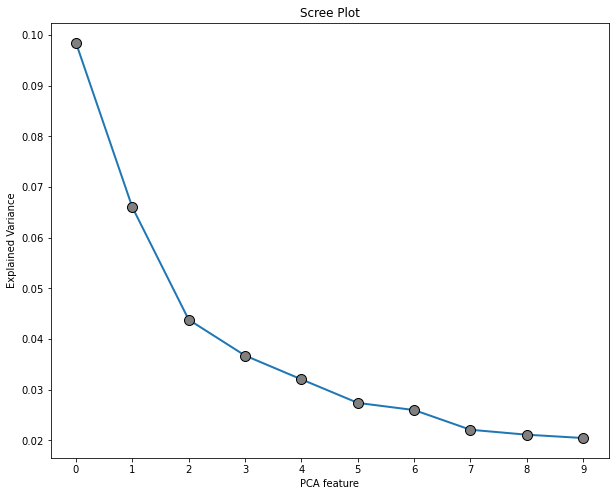

In [924]:
#Concatenate the PCs and then cluster

consumer_pscycho_df_scaled = pd.concat([psychometric_df_scaled,
                          consumer_behavior_df_scaled],
                          axis = 1)

consumer_pscycho_df_scaled.head()


# # INSTANTIATING a new model using the first three principal components
pca_10 = PCA(n_components = 10,
            random_state = 219)

# FITTING and TRANSFORMING the consu
customer_pca_10 = pca_10.fit_transform(consumer_pscycho_df_scaled)

# calling the scree_plot function
scree_plot(pca_object = pca_10)


In [925]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca_10.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df_consumer = factor_loadings_df.set_index(consumer_pscycho_df_scaled.columns)


# checking the result
# print(factor_loadings_df_consumer) #TODO: Remove unnecessary print
# print(factor_loadings_df)

# saving to Excel
# factor_loadings_df_consumer.to_excel('consumer_factor_loadings.xlsx')

In [926]:
#Naming each principal component for the combined data set consumer behavior and the psychometric data enable analysis

factor_loadings_df_consumer.columns = ['No value to social', 'Practical App-User', 'App\Trend lover', 'Financially Stable', 'Entertainment User', 'Tech Averse', 'Potential Early Adopter', 'Early Parenthood', 'Social Media Savvy', 'Rational buyer' ] #This is for the 10 components dictated by the scree plot


# checking the result
print(factor_loadings_df_consumer) #TODO: Remove this dump

        No value to social  Practical App-User  App\Trend lover  Financially Stable  Entertainment User  Tech Averse  Potential Early Adopter  Early Parenthood  Social Media Savvy  Rational buyer
q24r1                -0.02               -0.14             0.04               -0.24                0.00         0.16                    -0.01              0.01                0.11            0.21
q24r2                 0.16                0.12             0.13               -0.16                0.10        -0.09                    -0.17             -0.06               -0.11            0.06
q24r3                 0.02                0.11             0.22               -0.12                0.39        -0.05                    -0.03             -0.05                0.12           -0.02
q24r4                 0.03               -0.21            -0.04               -0.27               -0.07         0.27                     0.06             -0.05               -0.06            0.10
q24r5               

In [927]:

# analyzing factor strengths per customer
factor_loadings = pca_10.transform(consumer_pscycho_df_scaled)


# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)


# # renaming columns
factor_loadings_df.columns = factor_loadings_df_consumer.columns


# # checking the results
# factor_loadings_df.head(n = 5) 

In [928]:
# checking variance amongst clusters after the dataset concatenation
# print(np.var(factor_loadings_df))

In [929]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = factor_loadings_df)


# checking pre- and post-scaling variance
# print(np.var(factor_loadings_df), '\n\n')
# print(np.var(pca_scaled))

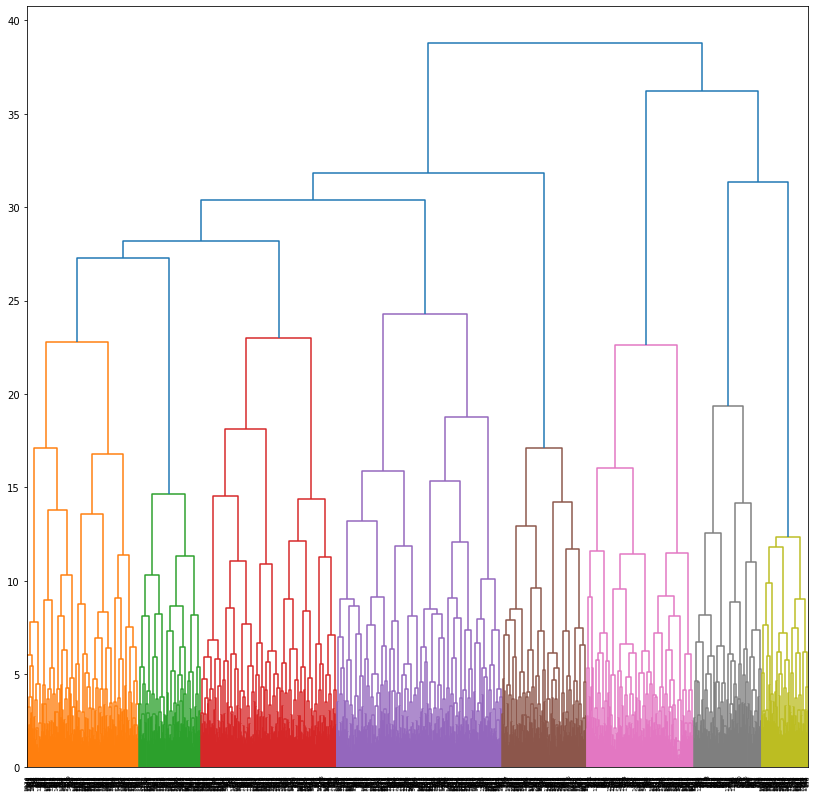

In [930]:
#Grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)

# setting plot size
fig, ax = plt.subplots(figsize=(14, 14))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)

# rendering the plot
plt.show()


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<strong>Clusters</strong>

The size of the business customers/responders have dictated the number of appropriate clusters to go with.
Without violating any rules 3 clusters were then appropriate, this gave the right level of specificity without being too detailed.
<br><br>
Below are the characteristics of the clusters:
<br><br>
<strong>Cluster 0:</strong>
<ul>
<li>Financially stable</li>
<li>Loves Apps (Example: Productivity Apps)</li>
<li>Practical users</li>
</ul>

<strong>Cluster 1:</strong>
<ul>
<li>Early adopters</li>
<li>Value social media</li>
<li>Impulsive buyers</li>
<li>Not prone to entertainment</li>
</ul>

<strong>Cluster 2:</strong>

<ul>
<li>Rational buyers</li>
<li>Uses entertainment Apps</li>
<li>Not practical users</li>
</ul>


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [931]:
# INSTANTIATING a k-Means object with x number of clusters
app_user_k_pca = KMeans(n_clusters   = 3,
                        random_state = 219)


# fitting the object to the data
app_user_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
app_user_kmeans_pca = pd.DataFrame({'Cluster': app_user_k_pca.labels_})


# checking the results to make sure that we are not in violation of the sample percentage
# print(app_user_kmeans_pca.iloc[: , 0].value_counts())

In [932]:
# storing cluster centers
centroids_pca = app_user_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['No value to social', 'Practical App-User', 'App\Trend lover', 'Financially Stable', 'Entertainment User', 'Tech Averse', 'Potential Early Adopter', 'Early Parenthood', 'Social Media Savvy', 'Rational buyer']

# checking results (clusters = rows, pc = columns) 
# centroids_pca_df.round(2)

In [933]:
#Renaming the demographic columns

demographic_df.columns = ['Age','Iphone','Apple Touch','Android','Blackberry','Nokia','Windows_Phone','HP/Palm','Tablet','Other Smart Phone','None/No Phone','Education Level','Marital Status','No_Children','Children_Under_6','Children_6_12','Children_13_17','Children_18','Race','Hispanic_Latino','Income_Before_Tax', 'Gender']

#Concatinating clusters with principal components
clst_pca_df = pd.concat([app_user_kmeans_pca,
                          factor_loadings_df],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([demographic_df,
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)


#Value Count.
# final_pca_clust_df.Windows_Phone.value_counts()
# final_pca_clust_df.head(n = 5) Checking for review

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Demographic: <strong>Age</strong>
<br>
Component: <strong>No value to social media</strong>

This cluster has got financially stable traits and happens to be the largest cluster, which values social media more than the average responder. Responder's age is between 45 to 49 years of age. This group understands the importance and impact of social media, however this is not directly proportional to their usage of social media.



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

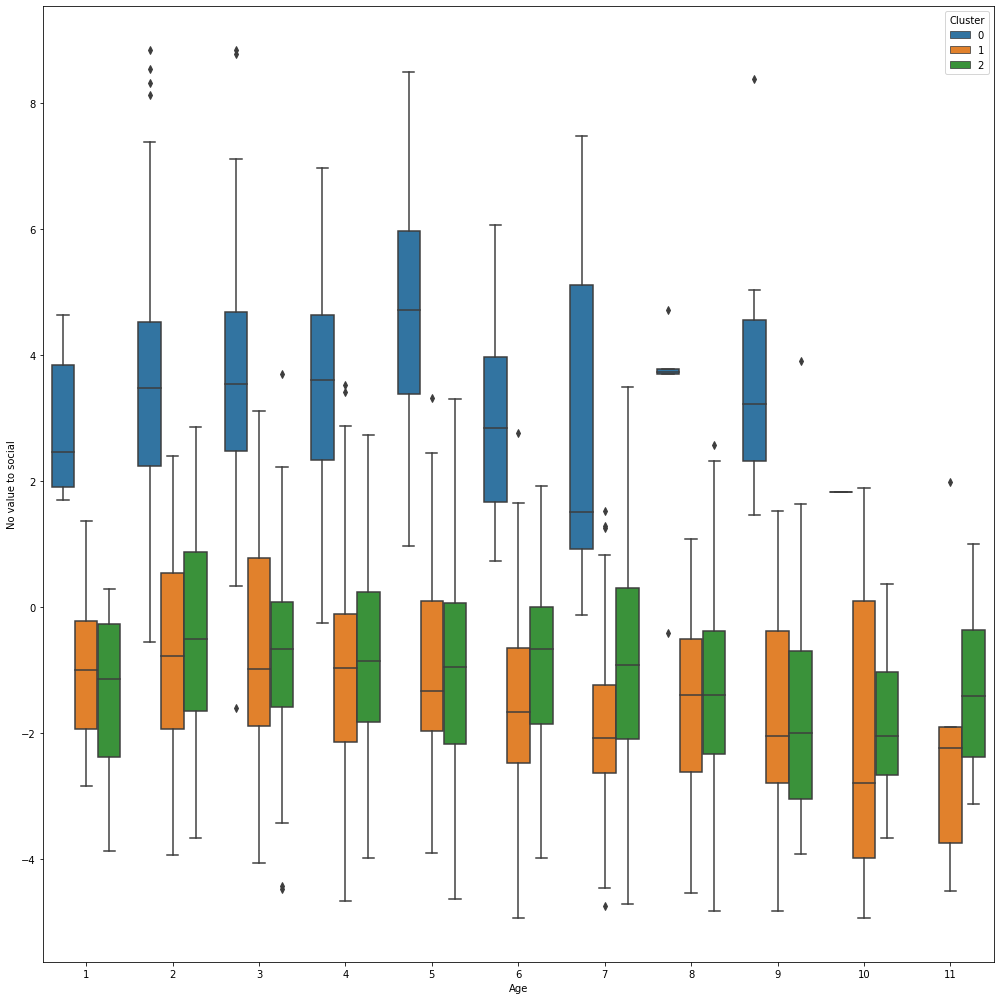

In [934]:
########################
# Demographic Age
########################

# Label
fig, ax = plt.subplots(figsize = (14, 14))
sns.boxplot(x = 'Age',
            y = 'No value to social',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Demographic: <strong>Age</strong>
<br>
Component: <strong>Practical App-User</strong>

The older a respondent is, the more they become practical in their usage of apps. These streamline the quality their app download and usage on the basis of how practical it is to their lives, and what value does it add in their day to day lives.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

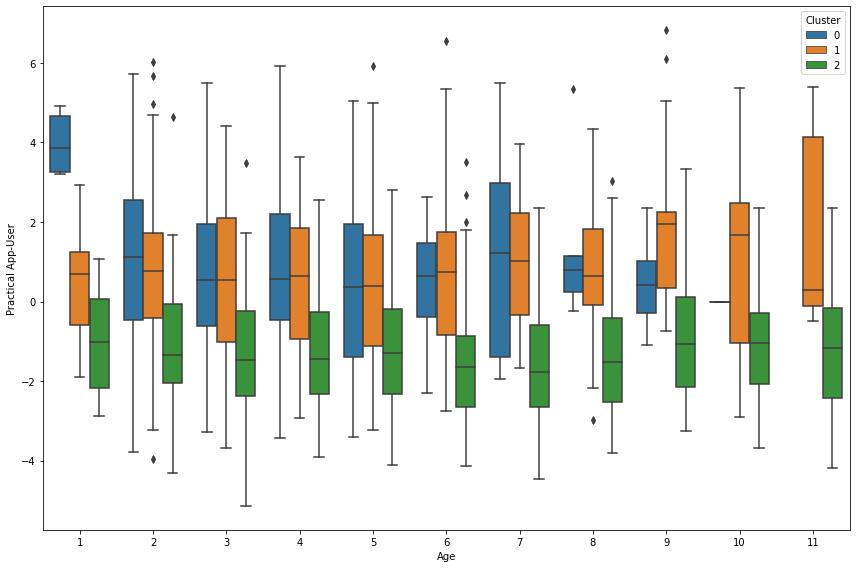

In [935]:
########################
# Demographic Age
########################

# Label
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age',
            y = 'Practical App-User',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Demographic: <strong>Age</strong>
<br>
Component: <strong>Potential Early Adopter</strong>

The early adopters respondents tend to be part of the cluster that houses more financially stable respondents. These are potential leaders in business, peaking in their careers, apt with applications and understand the current times of apps and the potential they hold to impact society. They are rational buyers, conversely to the younger generation which tends to be irrational buyers and less practical.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

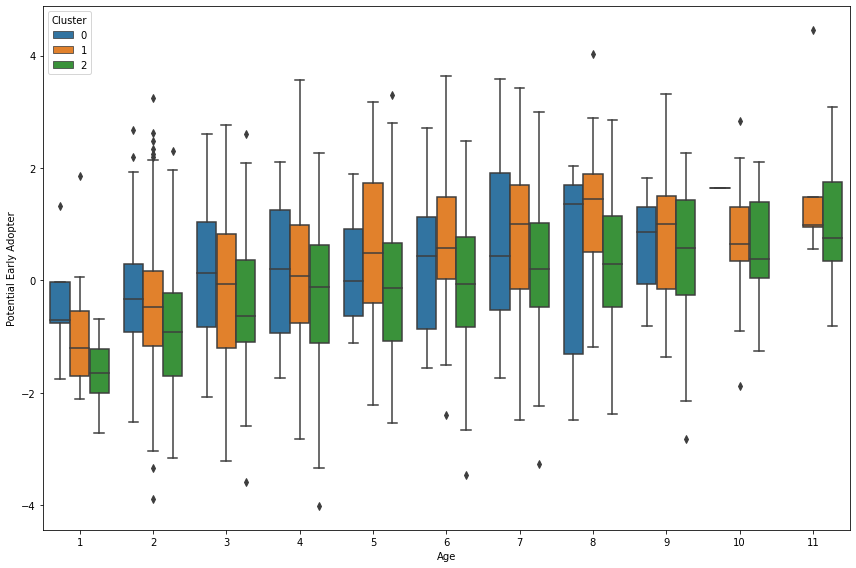

In [936]:
########################
# Demographic Age
########################

# Label
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age',
            y='Potential Early Adopter',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Demographic: <strong>Iphone & Android</strong>
<br>
Component: <strong>No value to social</strong>

The operating system of a phone does not influence the app download and or usage. Regardless of the operating system the market responds on average the same to mobile app downloads, usage and consumption.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

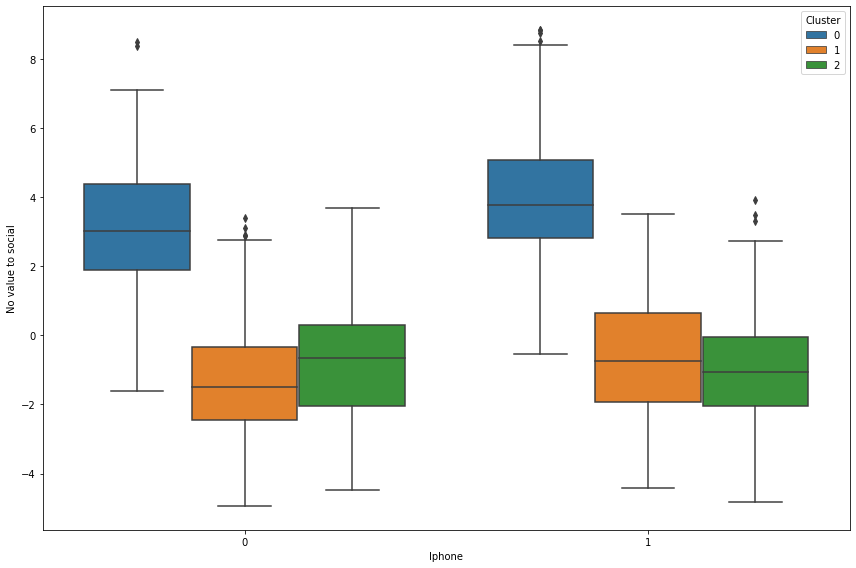

In [937]:
########################
# Demographic Iphone
########################

# Label
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Iphone',
            y = 'No value to social',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

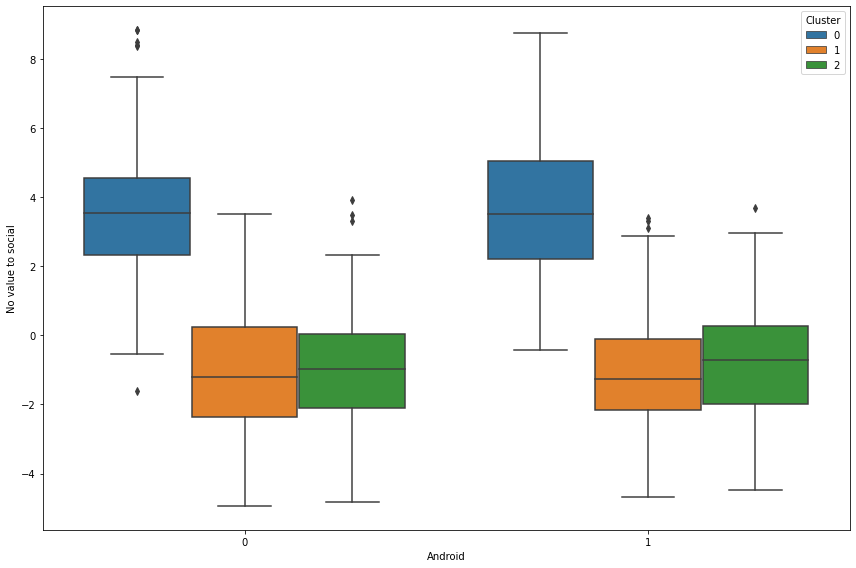

In [938]:
########################
# Demographic Android 
########################

# Label
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Android',
            y='No value to social',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Demographic: <strong>Education level</strong>
<br>
Component: <strong>Potential Early Adopter</strong>

The level of education has an overall influence with the interaction of the applications.
<br>
The more educated respondents tend to be:
<br>

<ul>
    <li>Tech averse: The more they know the more skeptical they become</li>
    <li>Early adopters: The more they know the more they value</li>
</ul>
    <br>
Conversely less educated respondents tend to lean towards apps for entertainment usage.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

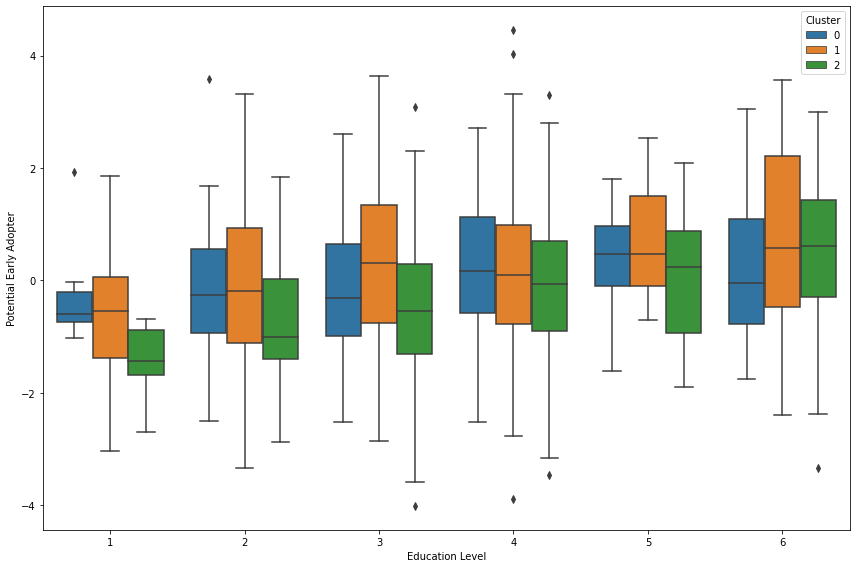

In [939]:
########################
# Demographic Education Level
########################

# Label
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Education Level',
            y='Potential Early Adopter',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Demographic: <strong>Education level</strong>
<br>
Component: <strong> Marital Status</strong>

The marital status does not necessarily change how respondents perceive or value social media, unless in certain cases such as divorce (this could indicate an alternate liking in relationships other than social media).

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

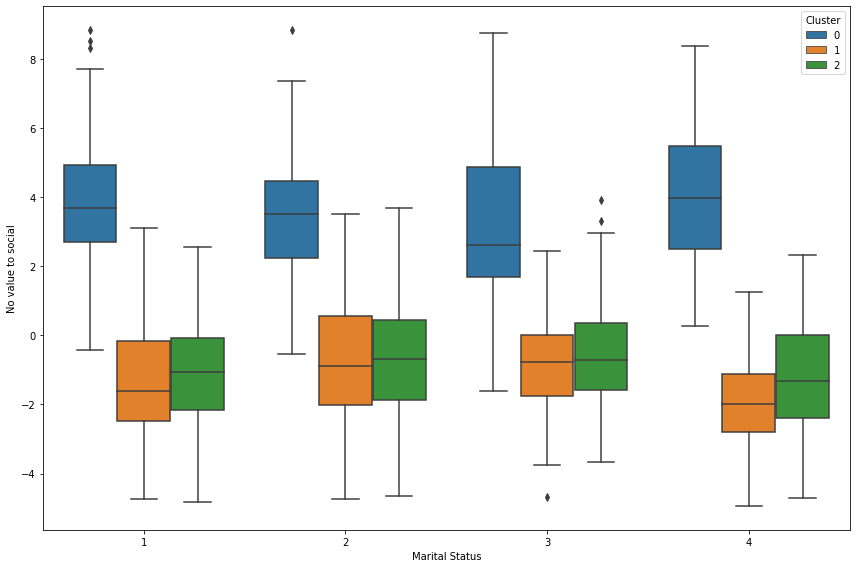

In [940]:
########################
# Demographic Marital Status 
########################

# Label
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Marital Status',
            y='No value to social',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Demographic: <strong>Education level</strong>
<br>
Component: <strong>Race</strong>

Race does not play a role in how the respondents have interacted with apps. However, within the pandemic this has had an impact on the native americans as they have used this to sage guard their traditions (https://www.cnn.com/2021/02/08/health/coronavirus-native-americans-internet-khn-wellness-partner/index.html). 


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

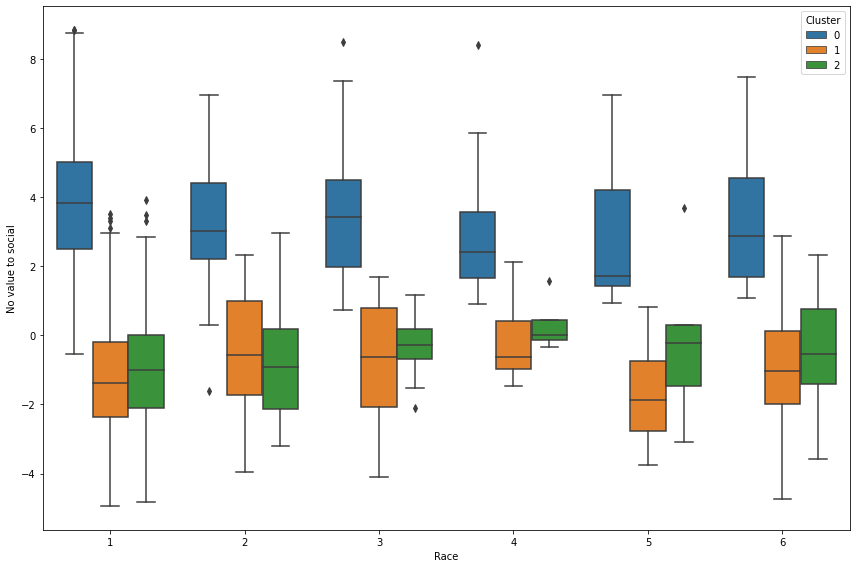

In [941]:
########################
# Demographic Race
########################

# Label
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Race',
            y='No value to social',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Demographic: <strong>Education level</strong>
<br>
Component: <strong>Race</strong>

The influence of the respondents earning in comparison to the app usage and consumption is minimalistic.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

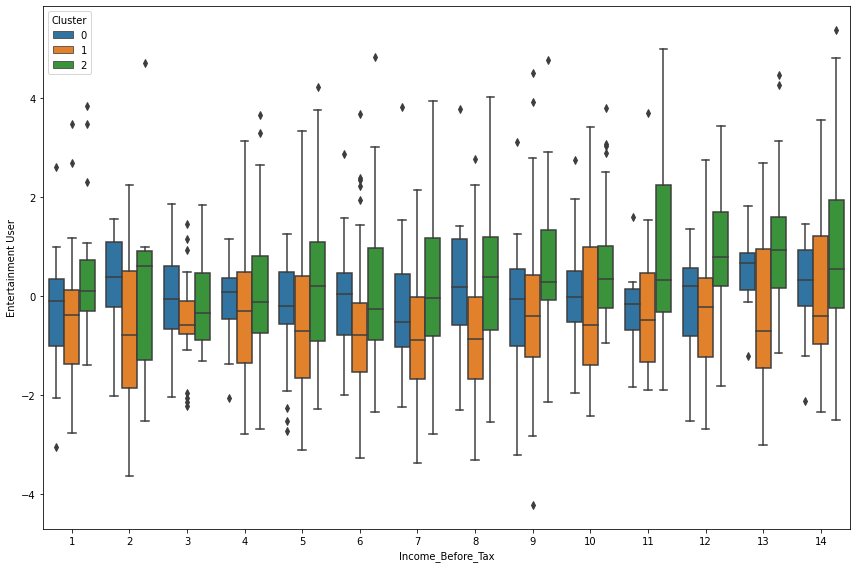

In [942]:
###############################
# Demographic Income Before Tax 
###############################

# Label
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Income_Before_Tax',
            y='Entertainment User',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Demographic: <strong>Education level</strong>
<br>
Component: <strong>Gender</strong>

Overall the gender of the respondents does not influence the consumption of the apps.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

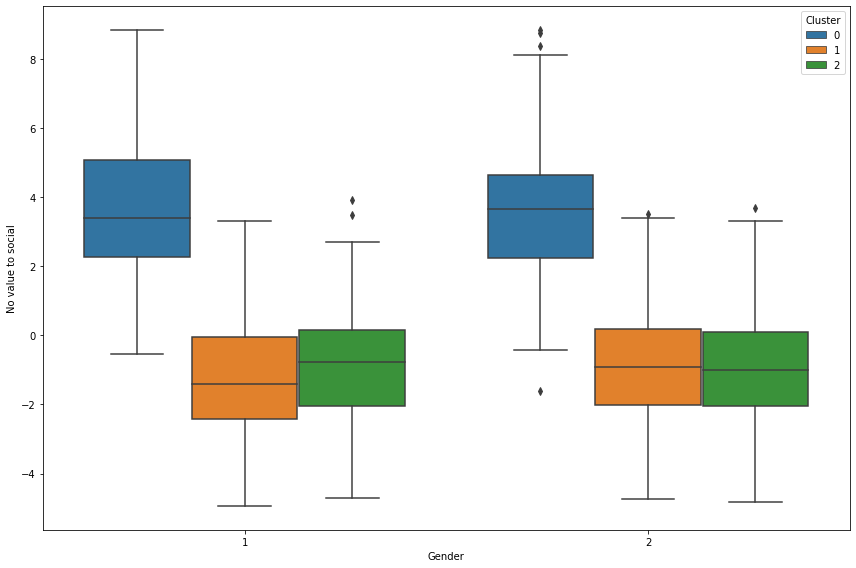

In [943]:
###############################
# Demographic Gender 
###############################

# Label
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y='No value to social',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()